## Imports

In [1]:
import pandas as pd
from os import makedirs, path, listdir
from data_classes import MetData
import matplotlib.pyplot as plt

## Code

In [2]:
url = "https://bulk.meteostat.net/hourly/03772.csv.gz"
data_folder = path.join(path.abspath(""), "met_data")

In [3]:
heathrow = MetData(data_folder, url=url)

### Download the data

In [ ]:
heathrow.download()

### Load the saved data

In [4]:
hourly_df = heathrow.read_csv()
hourly_df = hourly_df.loc[hourly_df.index.year>1970]

Reading hourly_heathrow_met_data.csv...


### Plot the time series

In [7]:
hourly_df.columns

Index(['temperature', 'dew_point', 'humidity', 'precip', 'wind_dir',
       'wind_speed', 'peak_gust', 'pressure'],
      dtype='object')

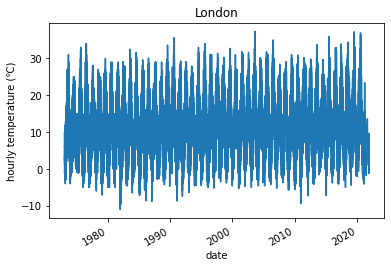

In [8]:
hourly_df["temperature"].plot(title="London").set_ylabel("hourly temperature (℃)")
plt.show()

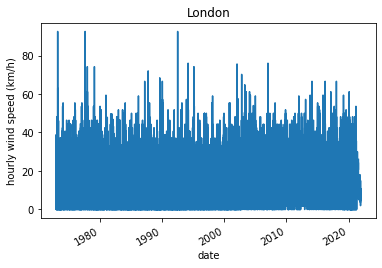

In [9]:
hourly_df["wind_speed"].plot(title="London").set_ylabel("hourly wind speed (km/h)")
plt.show()